In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(path, header):
    df = pd.read_csv(path, header = header)
    return df

In [3]:
# load insurance data with features {age, sex, bmi, children, smoker, region } and target charges
insurance_df = load_data("data/insurance.csv", header=0)

In [4]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#Convert string categories to integers 
insurance_df['sex_int'] = insurance_df['sex'].map({'female': 0, 'male': 1})
insurance_df['region_int'] = insurance_df['region'].map({'northeast': 0, 'northwest': 1, 'southeast' : 2, 'southwest': 3})
insurance_df['smoker_int'] = insurance_df['smoker'].map({'no': 0, 'yes': 1})

In [6]:
#Extract feature columns and convert to numpy matrix
regression_df = insurance_df[['age', 'bmi', 'children', 'sex_int', 'region_int', 'smoker_int']]
X_raw = regression_df.values

In [7]:
#Create theta with initially random values
theta = np.random.randn(X_raw.shape[1] + 1)

#Target values
y = insurance_df['charges']

In [8]:
# Prepend column of ones for x0
X = np.column_stack((np.ones(X_raw.shape[0]), X_raw))


In [9]:
X_small = X[0:2, :]
y_small = y[0:2]

In [10]:
def mse_cost_function(x, y, theta):
    #number of examples
    m = x.shape[0]
    # Projected target values
    h_theta = np.dot(x, theta)
    return (1/(2*m)) * np.sum((h_theta - y)**2)
    

In [11]:
mse_cost_function(X, y, theta)

160604596.78525722

In [12]:
theta.size

7

In [13]:
def batch_gradient_descent(x, y, theta):
    theta_new = theta
    #Alpha is learning rate
    alpha = 0.001
    max_iters = 40000
    m = x.shape[0]
    print("m = {}".format(m))
    mse = np.zeros(max_iters)
    #Epsilon measures cost convergence
    epsilon = 0.00001
    
    for i in range(0, max_iters):
        mse[i] = mse_cost_function(x, y, theta_new)
        if i > 1:
            cost_diff0 = abs(mse[i] - mse[i-1])
            cost_diff1 = abs(mse[i-1] - mse[i-2])
            if cost_diff0 < epsilon and cost_diff1 < epsilon:
                print("converged at iteration {}".format(i))
                break
        for x_sample,y_sample in zip(x, y):
            #Calculate estimated value of y
            h_theta = np.dot(x_sample, theta_new)
            #Calculate gradient
            gradient = (h_theta-y_sample)*x_sample
            theta_new = theta_new - (alpha/m)*gradient
       
    
    return theta_new, mse

In [14]:
theta_full, full_cost = batch_gradient_descent(X, y, theta)

m = 1338


In [15]:
theta_full

array([-7950.00501727,   239.07193654,   244.90819108,   407.59393587,
        -322.59664095,  -417.77093426, 23623.66752918])

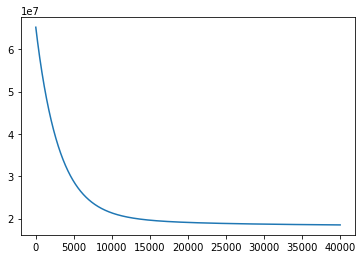

In [16]:
#Mean square error cost function of gradient descent 
plt.plot(full_cost[10:])

In [20]:
h_theta = np.dot(X, theta)

np.median(h_theta-y)

-9321.91088058343

In [21]:
from sklearn import linear_model

#Fit sklearn for comparison
lm = linear_model.LinearRegression()
model = lm.fit(X_raw, y)

In [22]:
model.coef_

array([  257.28807486,   332.57013224,   479.36939355,  -131.11057962,
        -353.64001656, 23820.43412267])

In [23]:
model.intercept_

-11815.452321231387

In [24]:
#Calculate % error from sklearn fit
model_coefs = np.append(model.intercept_, model.coef_)

100*(theta_full - model_coefs)/model_coefs

array([-32.71518685,  -7.08005543, -26.35893385, -14.97289119,
       146.04928289,  18.13451948,  -0.82604117])

In [25]:
model_coefs

array([-11815.45232123,    257.28807486,    332.57013224,    479.36939355,
         -131.11057962,   -353.64001656,  23820.43412267])